# Diamonds Dataset Visualization Notebook
This notebook explores the diamonds dataset using a variety of visualizations to tell a compelling story about diamond characteristics, pricing, and quality.

In [1]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# diamonds

# Exploratory Data Analysis of Diamonds Dataset

### Step 1: Basic Information about the Dataset

In [13]:
diamonds.info()
diamonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Step 2: Visualize the Distribution of Diamond Prices
Start by visualizing the distribution of diamond prices to show the overall price range.

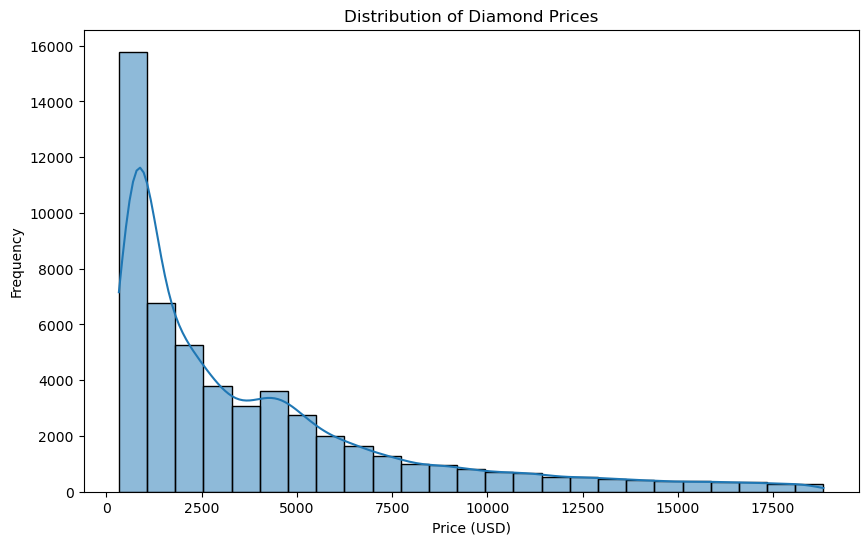

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], bins=25, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

**Story Insight:** This histogram provides insight into the price distribution. Note the skewness—most diamonds fall into a lower price range, with a few very expensive ones.

### Step 3: Examine the Relationship Between Carat and Price
Diamonds’ prices are influenced significantly by their carat weight. Plot this relationship using a scatter plot.

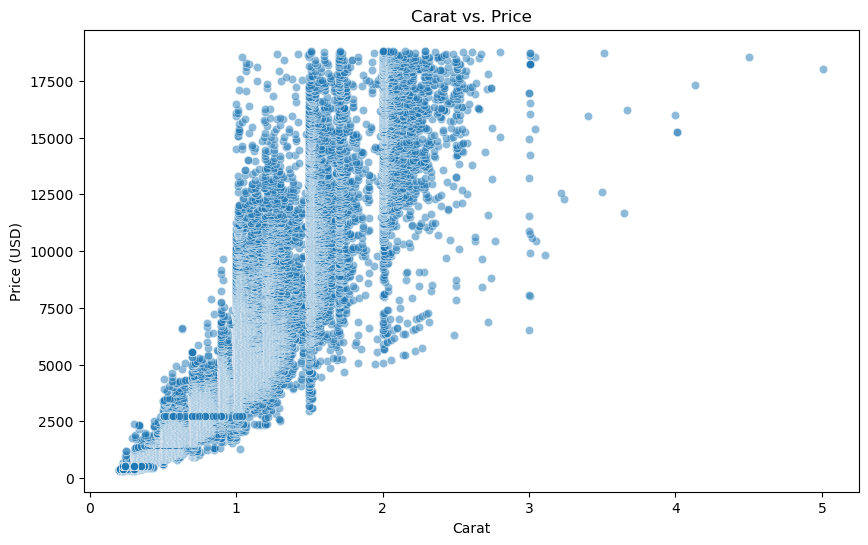

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds, alpha=0.5)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()

**Story Insight:** This scatter plot illustrates that as the carat weight increases, the price rises exponentially. Highlight any outliers that may indicate diamonds with high carat weight but lower prices.

### Step 4: Visualize Diamond Clarity vs. Price

Clarity impacts diamond pricing. Use a boxplot to show price variations across different clarity levels.




/tmp/ipykernel_536/2365723598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y='price', data=diamonds, palette='viridis')


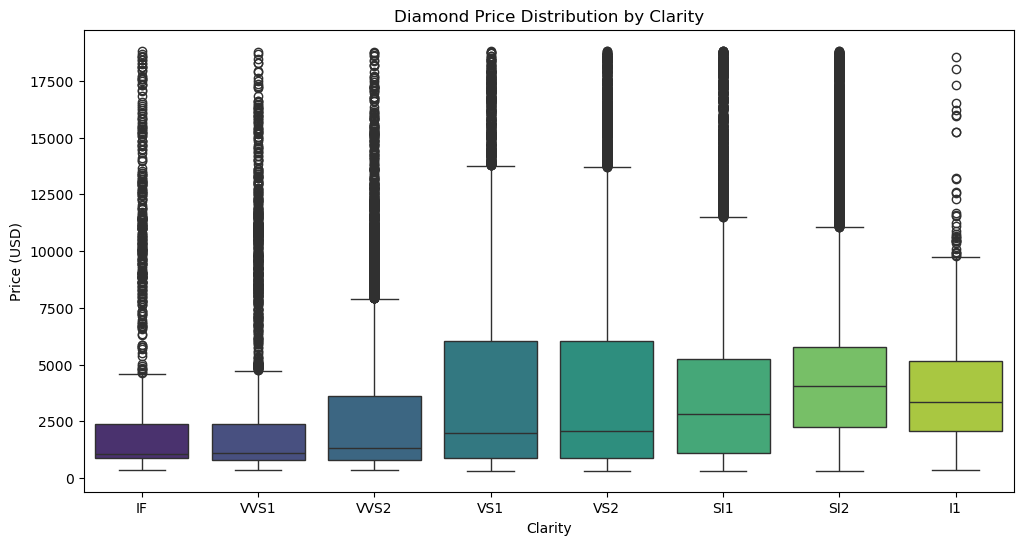

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=diamonds, palette='viridis')
plt.title('Diamond Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price (USD)')
plt.show()

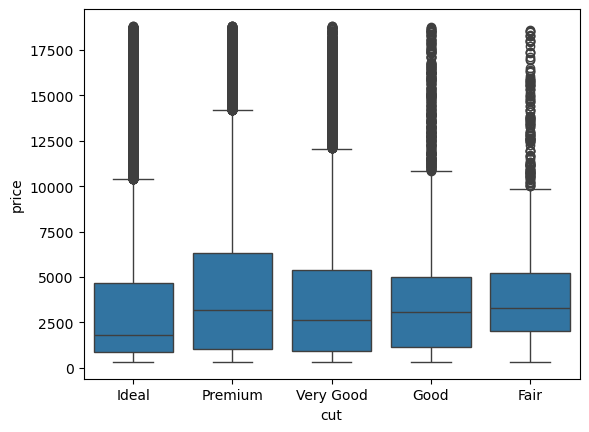

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cut', y='price', data=diamonds)
plt.show()

Story Insight: Emphasize how diamonds with better clarity (e.g., ‘IF’—Internally Flawless) generally have higher median prices. This visualization helps illustrate how clarity grades influence diamond value.

### Step 5: Explore Cut Quality and Price Trends

The quality of a diamond’s cut also affects its price. Let's visualize this using a violin plot.


/tmp/ipykernel_536/2380254053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cut', y='price', data=diamonds, palette='coolwarm')


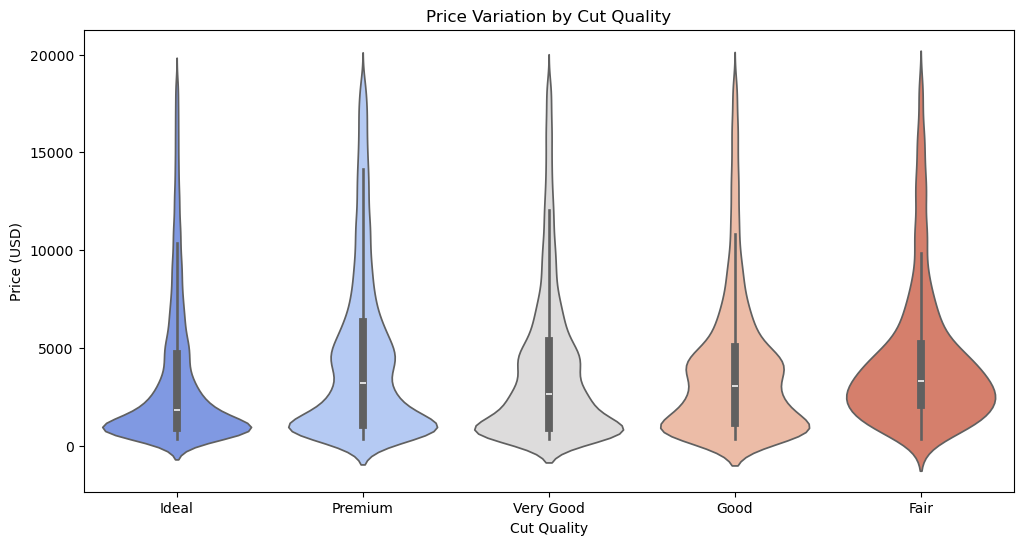

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='cut', y='price', data=diamonds, palette='coolwarm')
plt.title('Price Variation by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')
plt.show()

Story Insight: Violin plots combine information about the data’s density and distribution. Highlight that while ‘Ideal’ and ‘Premium’ cuts generally fetch higher prices, other cuts (e.g., ‘Fair’) have a broader range of values, indicating variability.



### Step 6: Create a Pair Plot for a Comprehensive Overview
To show the interaction between different features (like carat, price, depth, and table), use a pair plot.



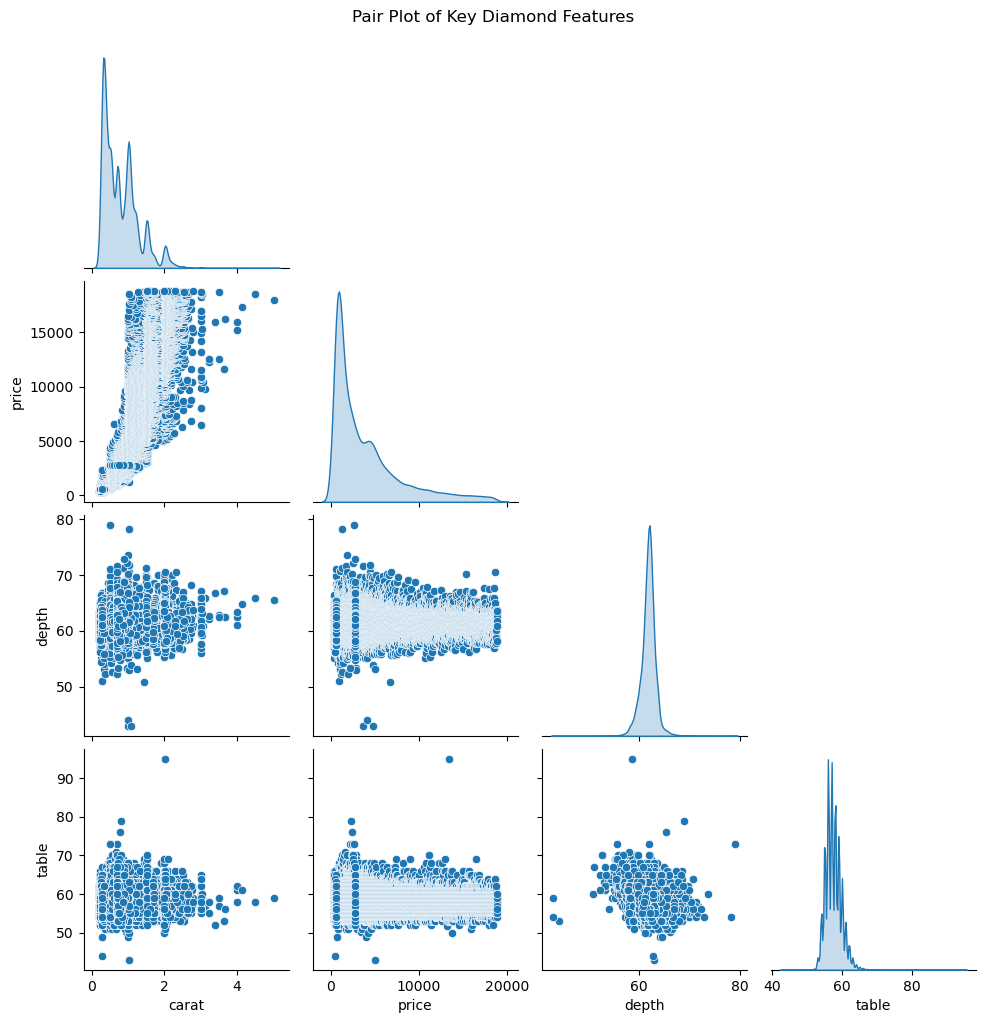

In [11]:
sns.pairplot(diamonds[['carat', 'price', 'depth', 'table']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Diamond Features', y=1.02)
plt.show()

Story Insight: Pair plots provide a comprehensive overview of how features relate to each other. This is useful for showing how price and carat are strongly correlated, while other attributes like depth and table might have weaker correlations.



### Step 7: Visualize the Count of Diamonds Based on Color

Use a bar plot to visualize the count of diamonds by their color grade.



/tmp/ipykernel_536/130405525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=diamonds, palette='magma')


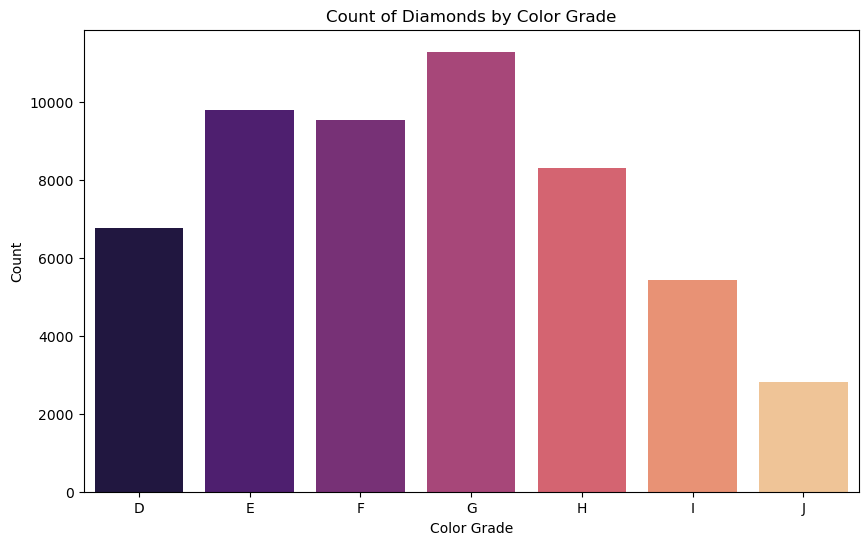

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=diamonds, palette='magma')
plt.title('Count of Diamonds by Color Grade')
plt.xlabel('Color Grade')
plt.ylabel('Count')
plt.show()

Story Insight: Highlight that certain colors (like ‘G’) are more common, which might influence pricing trends. Rarer colors often mean higher prices.



### Step 8: Visualize a Heatmap of Correlations Between Numerical Features
A heatmap can reveal the correlation between numerical features like carat, depth, table, and price.



In [ ]:
# Select only the numerical columns for the correlation matrix
numerical_cols = diamonds.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Diamond Features')
plt.show()


Story Insight: Emphasize the strong positive correlation between carat and price, while other features (like depth and table) have weaker associations. This indicates carat as a primary factor influencing diamond pricing.

### Step 9: Build a 3D Scatter Plot (Optional Advanced Visualization)
A 3D scatter plot can show the relationship between carat, price, and another feature like depth.



In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(diamonds['carat'], diamonds['depth'], diamonds['price'], c=diamonds['price'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price (USD)')
plt.title('3D Scatter Plot: Carat vs. Depth vs. Price')
plt.show()

Story Insight: This advanced plot provides an interactive perspective to showcase the effect of multiple features (carat and depth) on price simultaneously.



### Step 10: Add Insights and Annotations
Incorporate annotations and insights into your visualizations to highlight key points during your presentation.

For example, annotate the scatter plot to show a significant outlier:

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds, alpha=0.5)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
highest_priced = diamonds.loc[diamonds['price'].idxmax()]
plt.annotate('Highest Priced Diamond', xy=(highest_priced['carat'], highest_priced['price']),
             xytext=(4, 15000), arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

### FacetGrid: Price Distribution Across Different Cut Qualities

In [ ]:
g = sns.FacetGrid(diamonds, col='cut', col_wrap=3, height=4)
g.map(sns.histplot, 'price', bins=20)
g.fig.suptitle('Price Distribution Across Different Cut Qualities', y=1.02)
plt.show()